In [1]:
import numpy as np
#import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [55]:
adf = pd.read_pickle('adf_pickle.pkl')

bins = [adf.smmax.min(), .3, .4, .5, .6, .7, .8 , .9, 1]
labs = [.3, .4, .5, .6, .7, .8, .9, 1]
adf['bin'] = pd.cut(adf["smmax"], bins, labels=labs)
adf['bin'] = adf['bin'].astype(np.float32)

In [56]:
sc = adf.groupby(['dataset', 'bin', 'sm']).agg('count').groupby(level=[0]).cumsum().sort_values('bin')

In [57]:
sb = adf.groupby(['dataset', 'sm', 'bin']).agg('count').reset_index().sort_values(['bin', 'sm'])

In [58]:
scd = sc.drop("treatment", axis=1)
#scd.columns = ["dataset", "probability", "cluster", "count"]
#scd
#scdsorted = scd.sort_values(['probability', 'dataset', 'cluster'])
#scdsorted.to_csv("probabilities_all.csv")

In [59]:
#scdsorted.head(10)
scd.columns

Index(['smmax'], dtype='object')

In [ ]:
final = scd.unstack().fillna(0).reset_index().sort_values(['bin', 'dataset'])

In [ ]:
final.to_csv("probabilites.csv")

In [14]:
a = sc.reset_index().sort_values(["dataset", "sm"])
b = adf[adf['dataset']=='FSS 24h b']

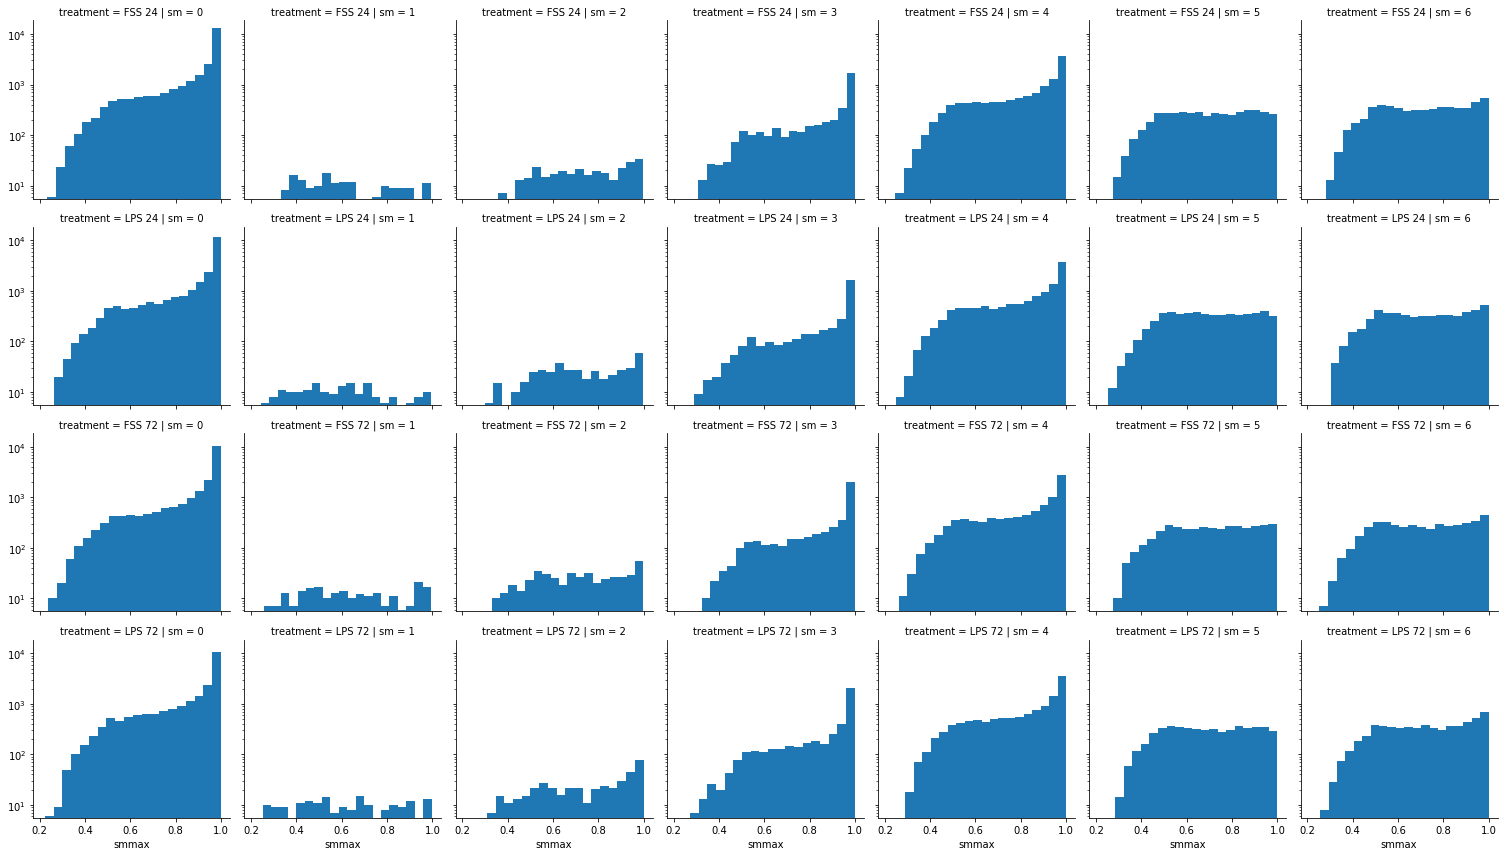

In [97]:
g = sns.FacetGrid(adf, col='sm', row='treatment')
g = g.map(plt.hist, "smmax", bins=20, log=True)

In [71]:
ga = adf.groupby(['bin', 'dataset', 'sm'])
#ga.groups.keys()
keys = list(ga.groups.keys())

In [77]:
f = ga.agg('count').reset_index()

In [51]:
adf.bin.dtype

dtype('float32')

In [96]:
z6 = f[f.bin < .601].groupby(['dataset', 'sm']).agg('sum').reset_index()
z5 = f[f.bin < .501].groupby(['dataset', 'sm']).agg('sum').reset_index()
z4 = f[f.bin < .401].groupby(['dataset', 'sm']).agg('sum').reset_index()
z6.to_csv('p6_counts.csv')
z5.to_csv('p5_counts.csv')
z4.to_csv('p4_counts.csv')